# Part2: Numeric Feature Analysis
Written by John Xi Qiu

In [1]:
# import cell and define data paths
import pandas as pd
import missingno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import scipy
from matplotlib import rc
import warnings
from scipy.stats import probplot
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import normalize
from scripts import zillow_data_loader
from statsmodels.formula.api import ols
import statsmodels
import statsmodels.api as sm

warnings.filterwarnings('ignore')
%matplotlib inline

#Set up Data Directories for Zillow data 
data_dir = "~/kaggle/zillow/"
fig_write_dir = "figures/"

#load 2016,2017 merged dataframe
merged = zillow_data_loader.load_train_data(data_dir)
#load 2.9 property test data
test = zillow_data_loader.load_test_data(data_dir)
bound_df = zillow_data_loader.df_percentile_bound(merged,2.5,97.5)



Shape Of Loaded Merged Zillow Data:  (167888, 63)


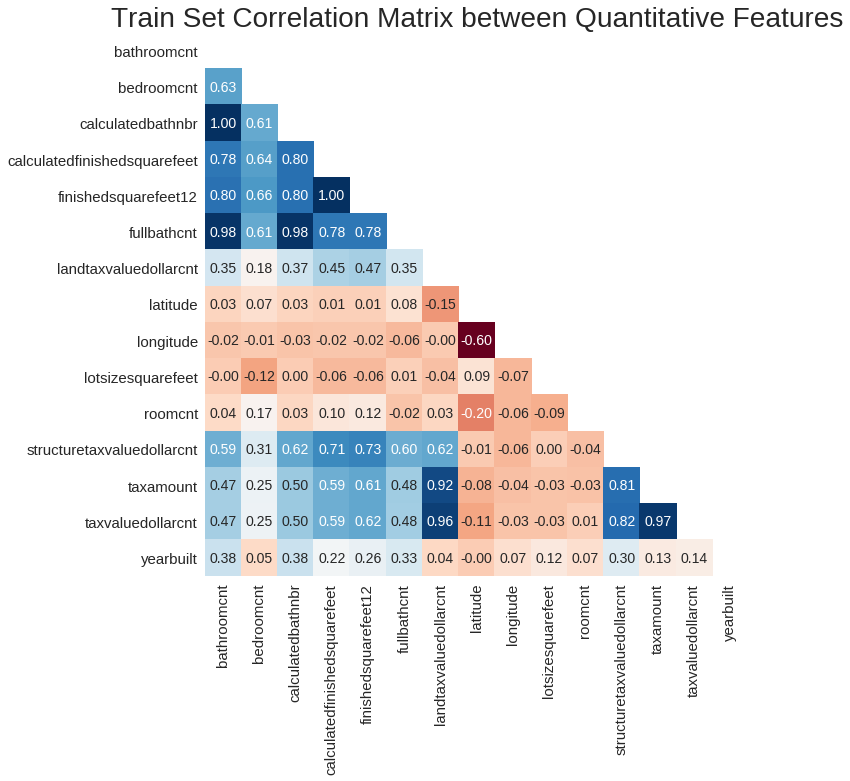

In [2]:
good_num_vars = zillow_data_loader.good_num_vars
pcat_var_list = zillow_data_loader.all_categorical_vars

sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
temp_df = bound_df[good_num_vars][good_num_vars]
corrmat = temp_df.corr(method='pearson')
#corrmat = temp_df.cov()
f, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap using seaborn
sns_plot = sns.heatmap(corrmat,mask=mask, vmax=1.,
                        square=True,cmap="RdBu", cbar = None,
                        annot=True, fmt=".2f",annot_kws={"size": 14})
                        #annot=True, fmt=".2f",annot_kws={"size": 12})
#sns.heatmap(corrmat,mask=mask, vmax=1., square=True,cmap="RdBu", annot=True, fmt=".2f",annot_kws={"size": 20})
plt.title("Train Set Correlation Matrix between Quantitative Features",fontsize=28)
plt.show()
out = sns_plot.get_figure()
out.savefig(fig_write_dir+'3-1.png', bbox_inches='tight',transparent = True, dpi=300)


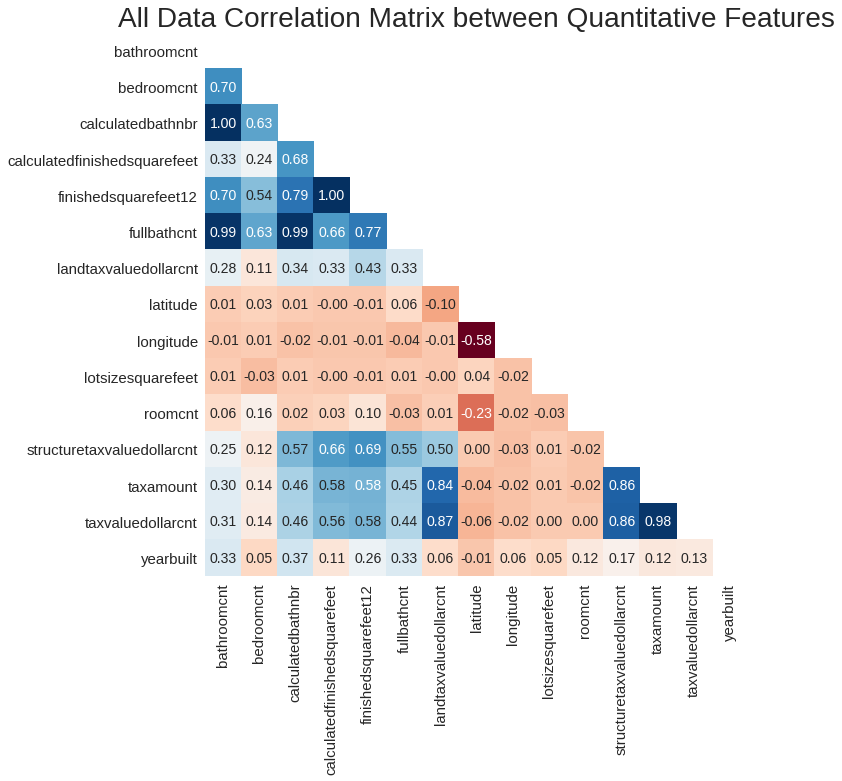

In [3]:
sns.set(font_scale=1.5)

plt.style.use('seaborn-whitegrid')
temp_df = test[good_num_vars][good_num_vars]
corrmat_test = temp_df.corr(method='pearson')
#corrmat = temp_df.cov()
f, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(corrmat_test)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap using seaborn
sns_plot = sns.heatmap(corrmat_test,mask=mask, vmax=1.,
                        square=True,cmap="RdBu", cbar = None,
                        annot=True, fmt=".2f",annot_kws={"size": 14})
                        #annot=True, fmt=".2f",annot_kws={"size": 12})
plt.title("All Data Correlation Matrix between Quantitative Features",fontsize=28)
plt.show()
out = sns_plot.get_figure()
out.savefig(fig_write_dir+'3-2.png', bbox_inches='tight',transparent = True, dpi=300)


In [4]:
print(np.max(corrmat.values))

1.0


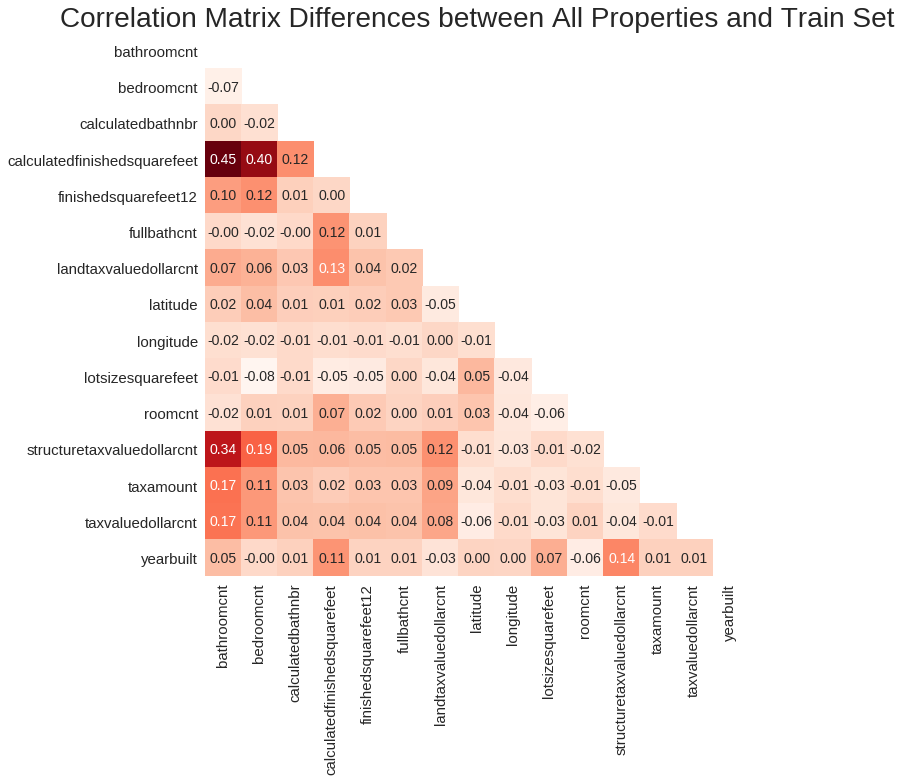

In [5]:
corr_diff = corrmat.subtract(corrmat_test)
f, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(corrmat_test)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap using seaborn
sns_plot = sns.heatmap(corr_diff,mask=mask, #vmax=1.,
                        square=True,cmap="Reds", cbar = None,
                        annot=True, fmt=".2f", vmin=np.min(corr_diff.values),
                        vmax = np.max(corr_diff.values),annot_kws={"size": 14})
                        #annot=True, fmt=".2f",
plt.title("Correlation Matrix Differences between All Properties and Train Set",fontsize=28)
plt.show()
out = sns_plot.get_figure()
out.savefig(fig_write_dir+'3-3.png', bbox_inches='tight',transparent = True, dpi=300)


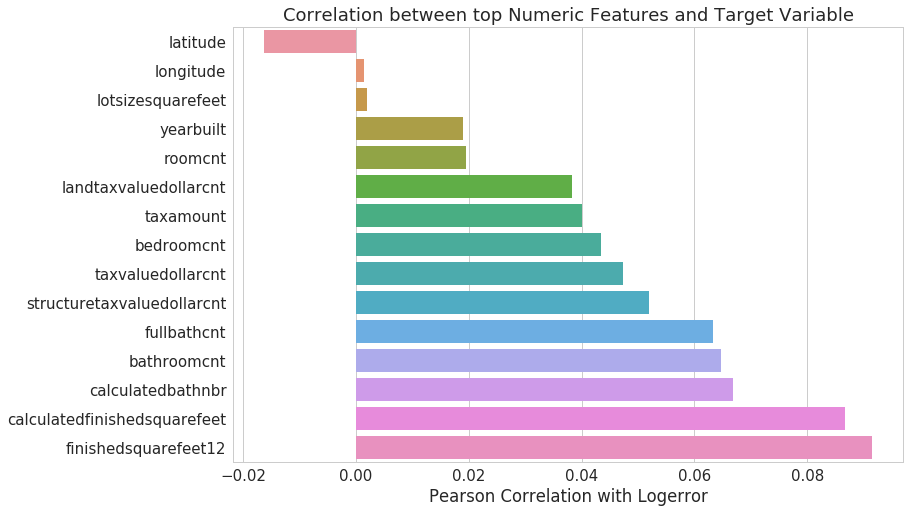

In [6]:
df = bound_df
corr_values = []
sns.set_style("whitegrid", {'axes.grid' : True})

for col in list(good_num_vars):
    na_filtered=df[df[col].notnull()]
    corr_values.append(np.corrcoef(na_filtered[col].values,
                            na_filtered.logerror.values)[0,1])
corr_df_bound = pd.DataFrame({'col_labels':good_num_vars, 'corr_values':corr_values})
corr_df_bound = corr_df_bound.sort_values(by='corr_values')


#color = sns.color_palette()
df = corr_df_bound
#ind = np.arange(len(labels))
#width = 0.9
#fig, ax = plt.subplots(figsize=(12,40))
plt.figure(figsize=(12,8))
sns_plot = sns.barplot(y="col_labels", x="corr_values", data=df)
#plt.ylabel('Numeric Features')
plt.ylabel('')
plt.xlabel('Pearson Correlation with Logerror')
plt.title("Correlation between top Numeric Features and Target Variable")

plt.show()
out = sns_plot.get_figure()
out.savefig(fig_write_dir+'3-4.png', bbox_inches='tight',transparent = True, dpi=300)


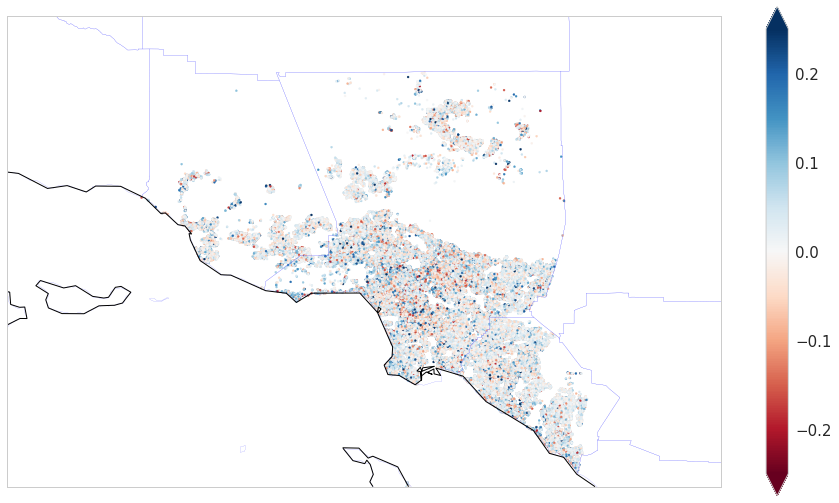

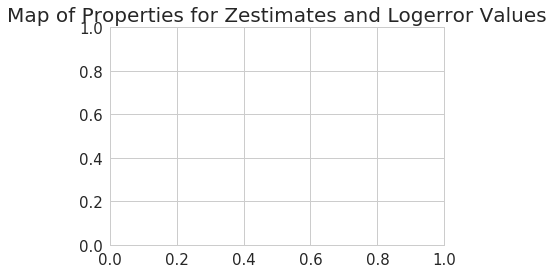

In [7]:
try:
    from mpl_toolkits.basemap import Basemap, cm

    maxlat = (bound_df['latitude']).max()
    maxlon = (bound_df['longitude']).max()
    minlat = (bound_df['latitude']).min()
    minlon = (bound_df['longitude']).min()

    CAparms = { 'llcrnrlat' : minlat,
                         'urcrnrlat' : maxlat+0.2,
                         'llcrnrlon' : maxlon-2.5,
                         'urcrnrlon' :minlon+2.5 }

    def create_basemap( llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60, figsize=(16,9) ):
        fig=plt.figure( figsize = figsize )
        Bm = Basemap( projection='merc', 
                    llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,
                    llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,
                    lat_ts=20,resolution='i' )
        # draw coastlines, state and country boundaries, edge of map.
        Bm.drawcoastlines(); Bm.drawstates(); Bm.drawcountries() 
        return Bm, fig    




    Bm, fig = create_basemap(**CAparms)
    x,y = Bm( bound_df['longitude'].values, bound_df['latitude'].values)                           
    Bm.scatter( x, y,c = bound_df['logerror'],cmap="RdBu", s = 4,
               vmin=-.25, vmax=.25)
    Bm.drawcounties(color='b')
    plt.colorbar(extend='both')
    plt.show()
    plt.title('Map of Properties for Zestimates and Logerror Values',
              fontsize=20)
    #plt.savefig(fig_write_dir+'3-5.png')
except ImportError:
    raise ImportError('please install the basemap package to plot the map')

Fig 2.1:

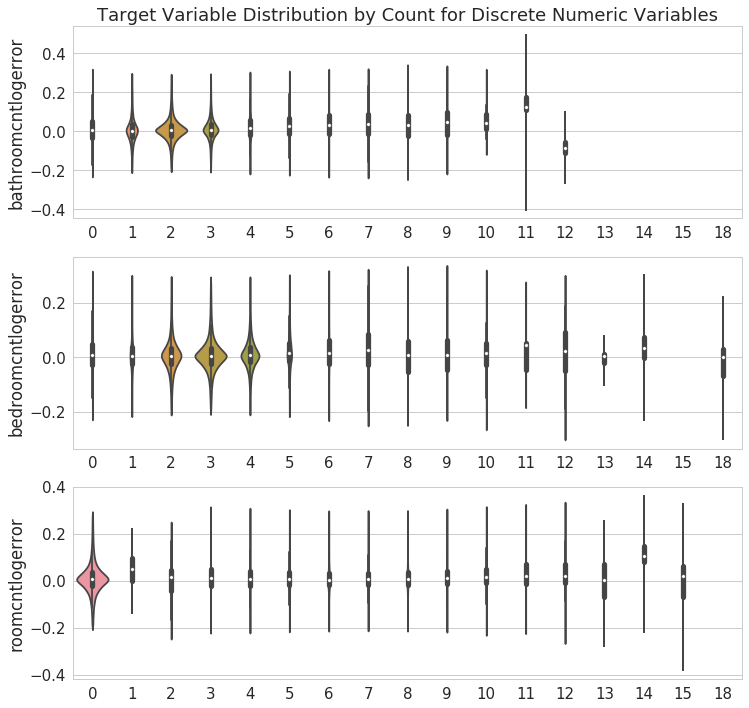

In [ ]:
def plot_numeric_plot_stack(x_var_list, df, y_data='logerror',out_name=None):
    num_plots = len(x_var_list)
    f, ax_list = plt.subplots(num_plots,figsize=(12,4*num_plots), sharex=True)
    #f.subplots_adjust(hspace=0.07, wspace=0.025)
    used_ax_list=[]
    for ith_x, x_var in enumerate(x_var_list):
        used_df = df[df[x_var].notna()]
        used_ax_list.append(sns.violinplot(x = used_df[x_var].astype("int"), y = used_df[y_data], ax = ax_list[ith_x],
                           scale="count"))
        
        used_ax_list[ith_x].xaxis.label.set_visible(False)
        #used_ax_list[ith_x].xaxis.xticklabels.set_visible(True)
        #used_ax_list[ith_x].tick_params(axis='both',which='minor')
        plt.setp(ax_list[ith_x].get_xticklabels(), visible=True)
        used_ax_list[ith_x].set_ylabel(x_var + 'logerror')
    used_ax_list[0].set(title='Target Variable Distribution by Count for Discrete Numeric Variables' )
    plt.show()
    if out_name:
        out = used_ax_list[0].get_figure()
        out.savefig(fig_write_dir+out_name,
                    bbox_inches='tight', transparent = True, dpi=300)

discrete_num_vars = ['bathroomcnt',"bedroomcnt","roomcnt"]
plot_numeric_plot_stack(discrete_num_vars,bound_df,out_name='3-6.png')

    

In [ ]:
from scripts.zillow_data_loader import snsFig2Grid
sns.set_style("whitegrid", {'axes.grid' : True})



def joint_plot_then_log_plot(x_data,df,y_data='logerror', out_name=None):
    df_temp = df[df[x_data].notnull()]
    df_temp_log_df = df_temp[df_temp[x_data]!= 0]
    df_temp_log_df["log_x_vals"]=np.log(df_temp_log_df[x_data]) 
    len_df = len(df_temp[y_data])
    #x_lims = np.percentile(df_temp[x_data],((1/len_df)*100,((len_df-1)/len_df)*100))
    x_lims = np.percentile(df_temp[x_data],(0,99))
    g0 = sns.JointGrid(x = df_temp[x_data], y = df_temp[y_data], ylim=[-.25,.25],
                       xlim=x_lims)
    g0 = g0.plot_joint(sns.regplot,scatter_kws={'s':1,
                                               'alpha':0.05})
    g0 = g0.plot_marginals(sns.distplot,color="b",kde=False)
    #g0 = g0.annotate(scipy.stats.pearsonr)
    g0_r = scipy.stats.pearsonr(df_temp[x_data],df_temp[y_data])[0]
    #g0.set(xlabel = x_data, ylabel = "pearsonr = "+ str(g0_r)[:5])
    g0.ax_joint.set_xlabel(x_data)
    g0.ax_joint.set_ylabel("pearsonr = "+ str(g0_r)[:5])

    #ylabel = 
    len_df = len(df_temp_log_df[y_data])
    #log_lims = np.percentile(df_temp_log_df[x_data],((1/len_df)*100,((len_df-1)/len_df)*100))
    log_lims = np.percentile(df_temp_log_df["log_x_vals"],(.1,100))
    #log_lims = (np.min(df_temp_log_df["log_x_vals"]),np.percentile(df_temp_log_df["log_x_vals"],99.9))
    g1 = sns.JointGrid(x = df_temp_log_df["log_x_vals"], y = df_temp_log_df[y_data],ylim=[-.25,.25],
                      xlim=log_lims)
    g1 = g1.plot_joint(sns.regplot,scatter_kws={'s':1,'alpha':0.05})
    g1 = g1.plot_marginals(sns.distplot,color="b",kde=False)
    #g1 = g1.annotate(scipy.stats.pearsonr, horizontalalignment='right', verticalalignment='bottom')
    g1_r = scipy.stats.pearsonr(df_temp_log_df["log_x_vals"],df_temp_log_df[y_data])[0]
    #g1.set(xlabel = "log_"+x_data, ylabel = "pearsonr = "+ str(g1_r)[:5])
    g1.ax_joint.set_xlabel("log_" + x_data)
    g1.ax_joint.set_ylabel("pearsonr = "+ str(g1_r)[:5])

    #g1.set_axis_labels(["log_"+x_data,"pearsonr = "+ str(g1_r)[:5]])
    
    fig = plt.figure(figsize=(10,4))
    gs = gridspec.GridSpec(1, 2)

    mg0 = snsFig2Grid(g0, fig, gs[0])
    mg1 = snsFig2Grid(g1, fig, gs[1])    
    gs.tight_layout(fig)
    plt.show()
    if out_name:
        #out = mg1.get_figure()
        fig.savefig(fig_write_dir+out_name+'.png', bbox_inches='tight',transparent = True, dpi=300)

joint_plot_then_log_plot('calculatedfinishedsquarefeet',bound_df,out_name = "3-7a")

In [ ]:
joint_plot_then_log_plot('finishedsquarefeet12',bound_df)#c

In [ ]:
joint_plot_then_log_plot('lotsizesquarefeet',bound_df)#d

In [ ]:
joint_plot_then_log_plot('structuretaxvaluedollarcnt',bound_df)#e

In [ ]:
joint_plot_then_log_plot('taxamount',bound_df)#f

In [ ]:
joint_plot_then_log_plot('taxvaluedollarcnt',bound_df)#g

In [ ]:
joint_plot_then_log_plot('landtaxvaluedollarcnt',bound_df)#h